# Figure 5: Leading authors

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import stat_lib

from pathlib import Path
# Create directory structure if it doesn't exist
Path(f"figures/figure_tables").mkdir(parents=True, exist_ok=True)


import plot_info # Does this set the plot style ? Yes it does
import wrangling

assessment_columns = plot_info.assessment_columns

leading_author_claims = pd.read_csv("preprocessed_data/leading_author_claims.csv")
author_metrics = wrangling.create_author_metric(claim_df = leading_author_claims,
                                                variable= "leading_author_key",
                                                other_col={"Leading Author Name":('Leading Author Name', 'first')},)
author_metrics_after_2000 = wrangling.create_author_metric(
                                                claim_df=leading_author_claims[leading_author_claims['year'] > 2000], 
                                                variable= "leading_author_key", 
                                                other_col={"Leading Author Name":('Leading Author Name', 'first')},)


In [2]:
author_metrics

,leading_author_key,Major claims,Articles,Leading Author Name,Challenged,Mixed,Partially Verified,Unchallenged,Verified,Unchallenged prop,Verified prop,Partially Verified prop,Mixed prop,Challenged prop
0,agaisse h,3,1,Agaisse H,0,0,0,2,1,0.666667,0.333333,0.000000,0.0,0.0
1,aguilera rj,2,1,Aguilera RJ,1,0,0,0,1,0.000000,0.500000,0.000000,0.0,0.5
2,aigaki t,3,1,Aigaki T,0,0,0,2,1,0.666667,0.333333,0.000000,0.0,0.0
3,anderson kv,20,8,Anderson KV,2,0,0,7,11,0.350000,0.550000,0.000000,0.0,0.1
4,ando i,12,6,Andó I,0,0,4,1,7,0.083333,0.583333,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,xu t,3,1,Xu T,0,0,0,0,3,0.000000,1.000000,0.000000,0.0,0.0
152,yamaguchi m,2,1,Yamaguchi M,0,0,0,1,1,0.500000,0.500000,0.000000,0.0,0.0
153,yoo ma,3,1,Yoo MA,0,0,1,0,2,0.000000,0.666667,0.333333,0.0,0.0
154,yu xq,3,1,Yu XQ,0,0,0,1,2,0.333333,0.666667,0.000000,0.0,0.0


In [3]:
leading_author_claims.columns

Index(['id', 'content', 'article_id', 'rank', 'pmid', 'authors_txt', 'title',
       'pmid_article', 'volume', 'issue', 'abstract', 'year', 'journal_name',
       'impact_factor', 'first_author_extracted', 'last_author_extracted',
       'primary_affiliation', 'country', 'assertion_type', 'label',
       'is_assessed', 'assessment_type', 'rank_assessment_type',
       'shangai_ranking_2010', 'assessment_type_grouped', 'author_id', 'name',
       'leading_author', 'first_author', 'career_stage', 'expertise_level',
       'author_key', 'Leading Author Name', 'Historical lab',
       'Historical lab after 1998', 'Continuity', 'F and L',
       'Leading Author Sex', 'Start lab', 'Finish', 'Authorship',
       'leading_author_key', 'Junior Senior'],
      dtype='object')

In [4]:
print(len(author_metrics))
# TODO update all with this ?
print(len(author_metrics))

156
156


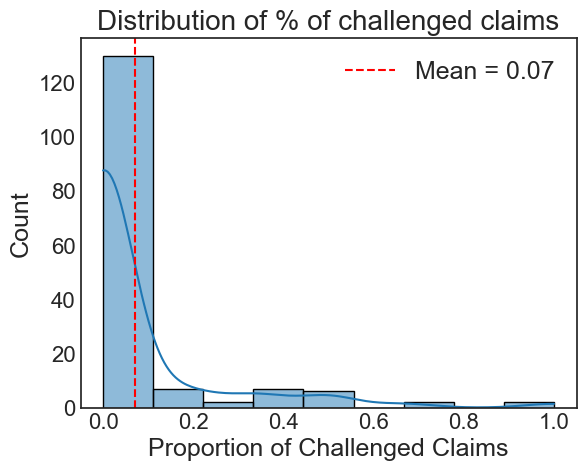

Descriptive Statistics:


,Unchallenged,Verified,Partially Verified,Mixed,Challenged,Unchallenged prop,Verified prop,Partially Verified prop,Mixed prop,Challenged prop,Challenged prop,Articles,Major claims
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,1.538462,3.910256,0.480769,0.076923,0.442308,0.280872,0.572245,0.062844,0.013642,0.070396,0.070396,2.564103,6.448718
std,2.301149,6.723451,0.973661,0.331924,1.096860,0.322156,0.340278,0.137738,0.064930,0.176316,0.176316,3.483009,9.166063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,1.000000,2.000000,0.000000,0.000000,0.000000,0.200000,0.625000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,2.000000,4.000000,1.000000,0.000000,0.000000,0.500000,0.878472,0.066667,0.000000,0.000000,0.000000,2.000000,6.000000
max,17.000000,47.000000,6.000000,2.000000,7.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,28.000000,67.000000


In [5]:
descriptive_stats = author_metrics[assessment_columns + [col + ' prop' for col in assessment_columns] + 
                    ['Challenged prop', 'Articles', 'Major claims']].describe()

sns.histplot(author_metrics['Challenged prop'], kde=True)
plt.title('Distribution of % of challenged claims')
plt.xlabel('Proportion of Challenged Claims')
plt.axvline(author_metrics['Challenged prop'].mean(), color='red', linestyle='--', 
            label=f'Mean = {author_metrics["Challenged prop"].mean():.2f}')
plt.legend()
plt.show()
print("Descriptive Statistics:")
descriptive_stats

## A. Distribution plot

Our analysis will focus on the 156 PIs who published at least 0 major claims from aminimum of 0 articles
Among the 156 PIs, we identified 26 laboratories where more than 10% of the claims were challenged, with the highest proportion reaching 100.0% 


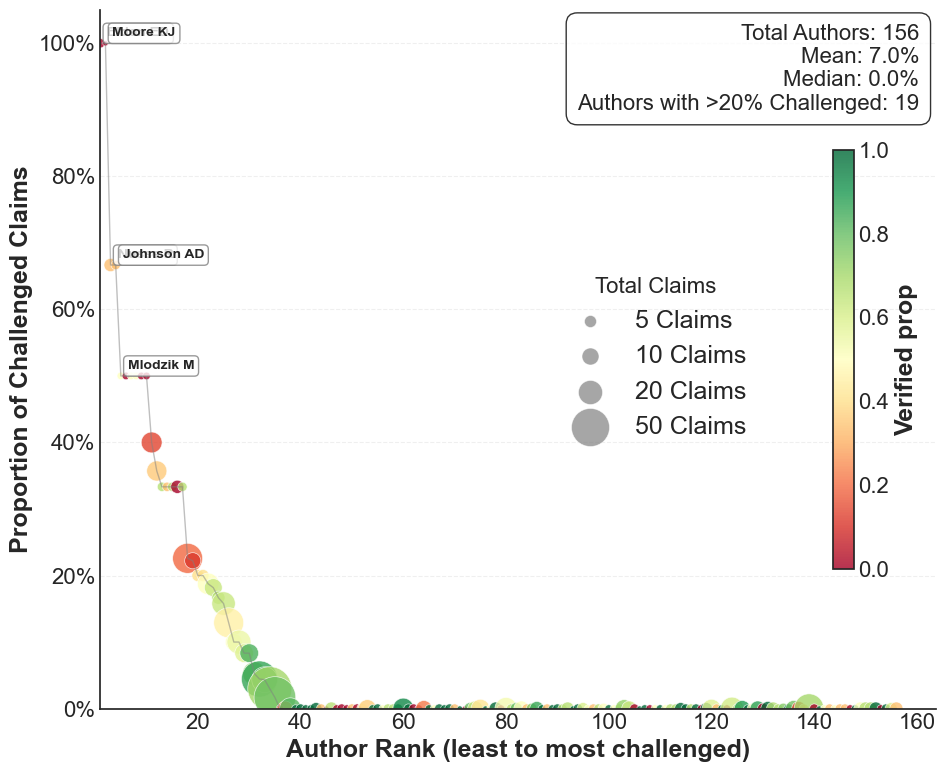

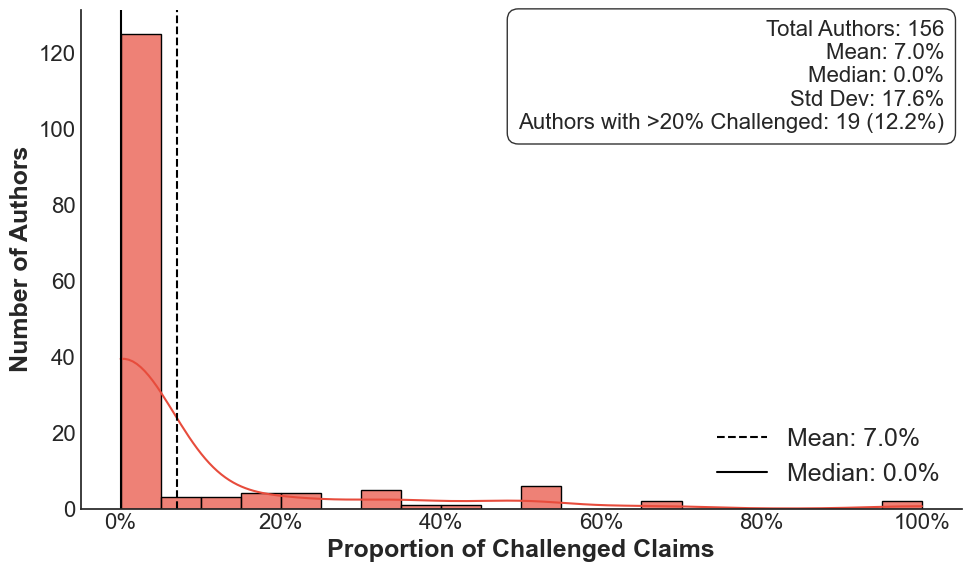

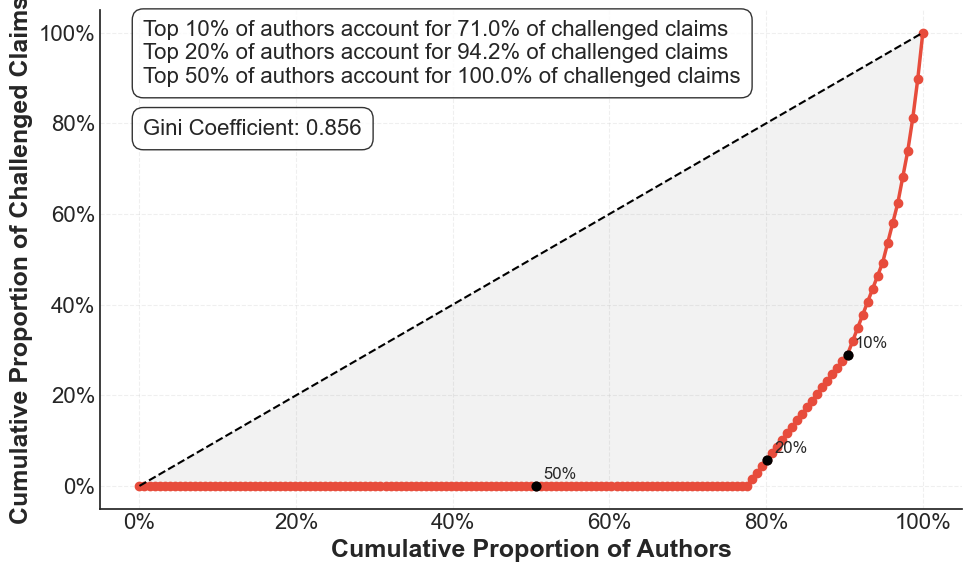

In [6]:
to_plot = author_metrics.copy()
min_articles = 0
min_claims = 0
to_plot = to_plot[to_plot['Articles'] >= min_articles]
to_plot = to_plot[to_plot['Major claims'] >= min_claims]
print(f"Our analysis will focus on the {len(to_plot)} PIs who published at least {min_claims} major claims from a"
      f"minimum of {min_articles} articles")
print(f"Among the {len(to_plot)} PIs, we identified {len(to_plot[to_plot['Challenged prop']>.1])} laboratories "
      f"where more than 10% of the claims were challenged, with the highest proportion reaching"
      f" {max(to_plot['Challenged prop']*100)}% ")


fig, ax = plot_info.plot_author_irreproducibility_focused(
    df=to_plot,
    title="",
    color_by='Verified prop',
    cmap='RdYlGn',  # Choose colormap that doesn't have white at minimum
    most_challenged_on_right=True,
    name_col='Leading Author Name',
)
plt.savefig('figures/fig6A_distribution_scatter.png', dpi=300, bbox_inches='tight')
fig1, ax1 = plot_info.plot_challenged_histogram(to_plot,title="",)
#plt.savefig('figures/fig5A-V2.png', dpi=300, bbox_inches='tight')

# Create Lorenz curve visualization
fig2, ax2 = plot_info.plot_lorenz_curve(to_plot,
                                        title="",)
plt.savefig('figures/fig6B_distribution_gini.png', dpi=300, bbox_inches='tight')

In [7]:
author_metrics

,leading_author_key,Major claims,Articles,Leading Author Name,Challenged,Mixed,Partially Verified,Unchallenged,Verified,Unchallenged prop,Verified prop,Partially Verified prop,Mixed prop,Challenged prop
0,agaisse h,3,1,Agaisse H,0,0,0,2,1,0.666667,0.333333,0.000000,0.0,0.0
1,aguilera rj,2,1,Aguilera RJ,1,0,0,0,1,0.000000,0.500000,0.000000,0.0,0.5
2,aigaki t,3,1,Aigaki T,0,0,0,2,1,0.666667,0.333333,0.000000,0.0,0.0
3,anderson kv,20,8,Anderson KV,2,0,0,7,11,0.350000,0.550000,0.000000,0.0,0.1
4,ando i,12,6,Andó I,0,0,4,1,7,0.083333,0.583333,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,xu t,3,1,Xu T,0,0,0,0,3,0.000000,1.000000,0.000000,0.0,0.0
152,yamaguchi m,2,1,Yamaguchi M,0,0,0,1,1,0.500000,0.500000,0.000000,0.0,0.0
153,yoo ma,3,1,Yoo MA,0,0,1,0,2,0.000000,0.666667,0.333333,0.0,0.0
154,yu xq,3,1,Yu XQ,0,0,0,1,2,0.333333,0.666667,0.000000,0.0,0.0


## B. Binary variables

Actual groups found: [False, True]

Leading Author Historical lab after 1998  false vs true was not significantly associated with claim reproducibility (p = 0.08);
  8.7% (95% CI 8.6–8.7%) vs 5.0% (95% CI 4.9–5.0%) of claims were challenged for False vs True, respectively. 
 Odds Ratio = 1.82 (95% CI 0.95–3.47).

Summary of Historical lab after 1998:
                           Major claims  Articles  Verified_prop  \
Historical lab after 1998                                          
False                               578       232       0.513841   
True                                242        93       0.727273   

                           Challenged_prop  Unchallenged_prop  n_authors  
Historical lab after 1998                                                 
False                             0.086505           0.311419        117  
True                              0.049587           0.136364         27  
....................
                           Major claims  Articles Lea

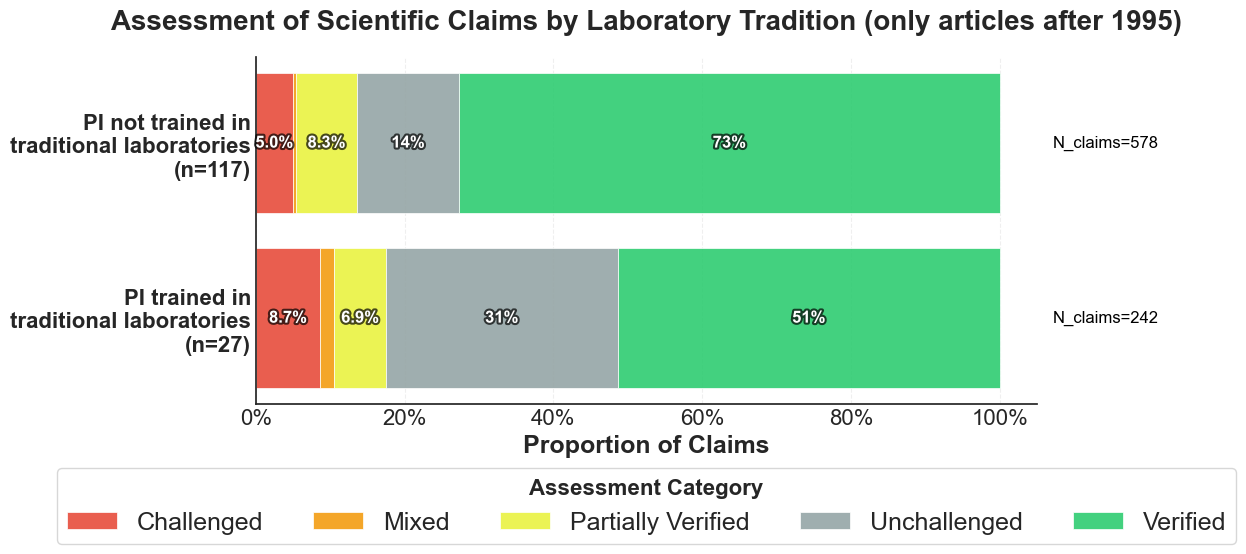

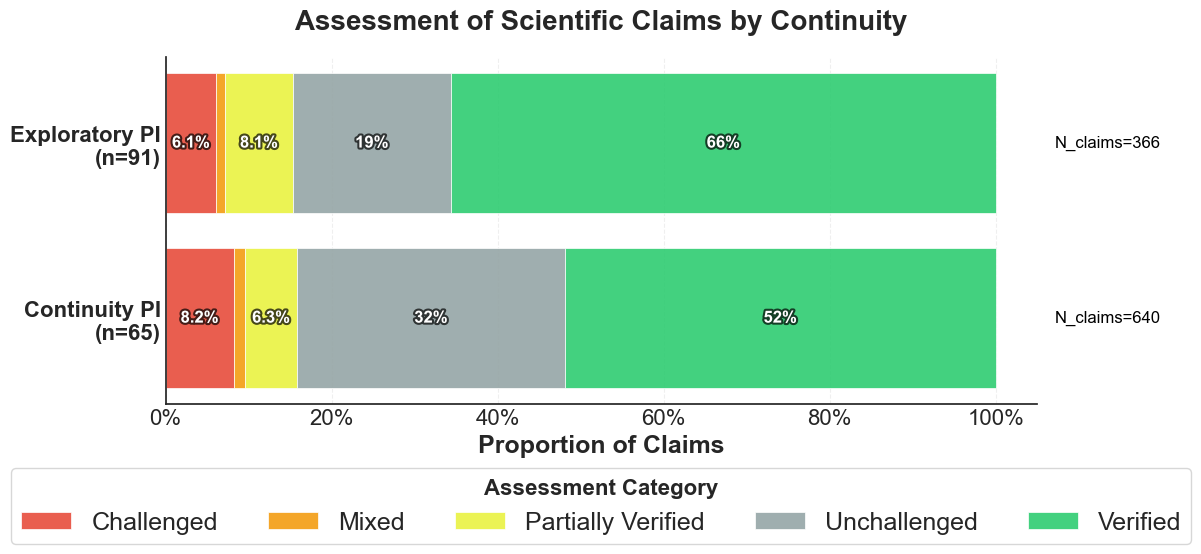

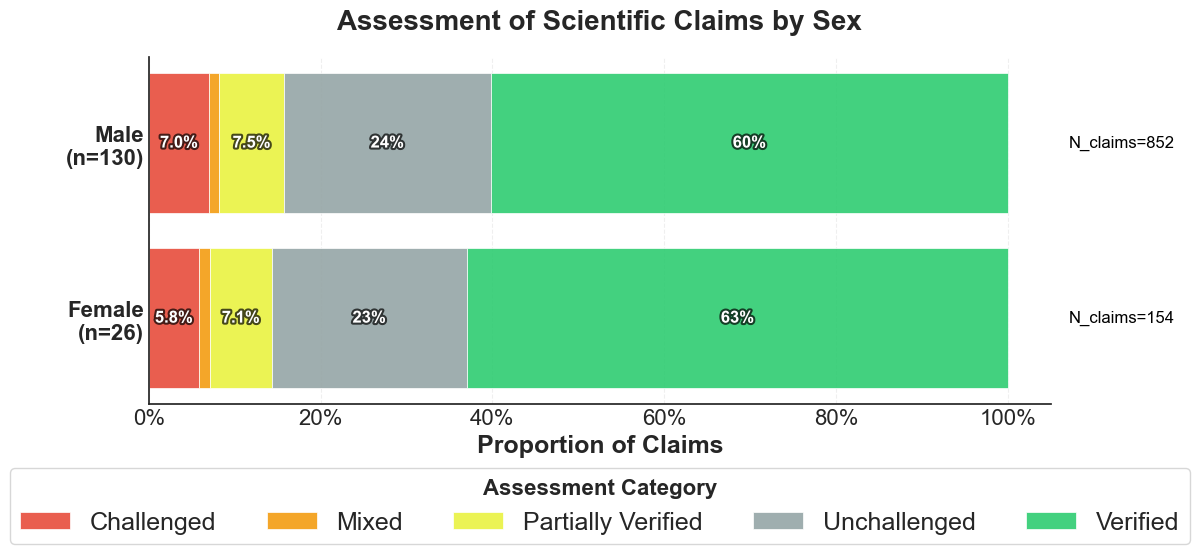

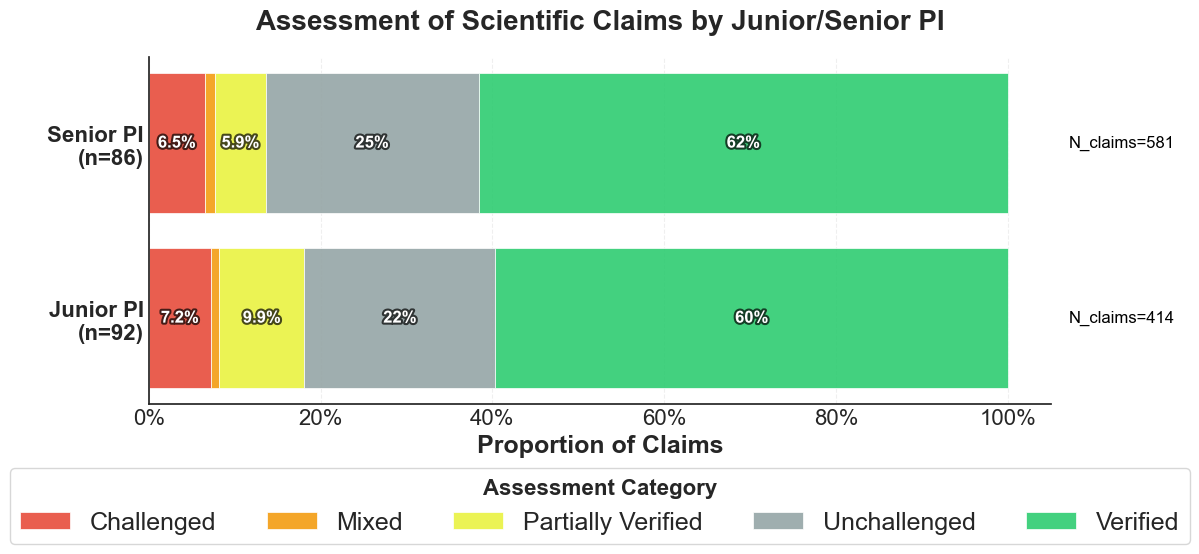

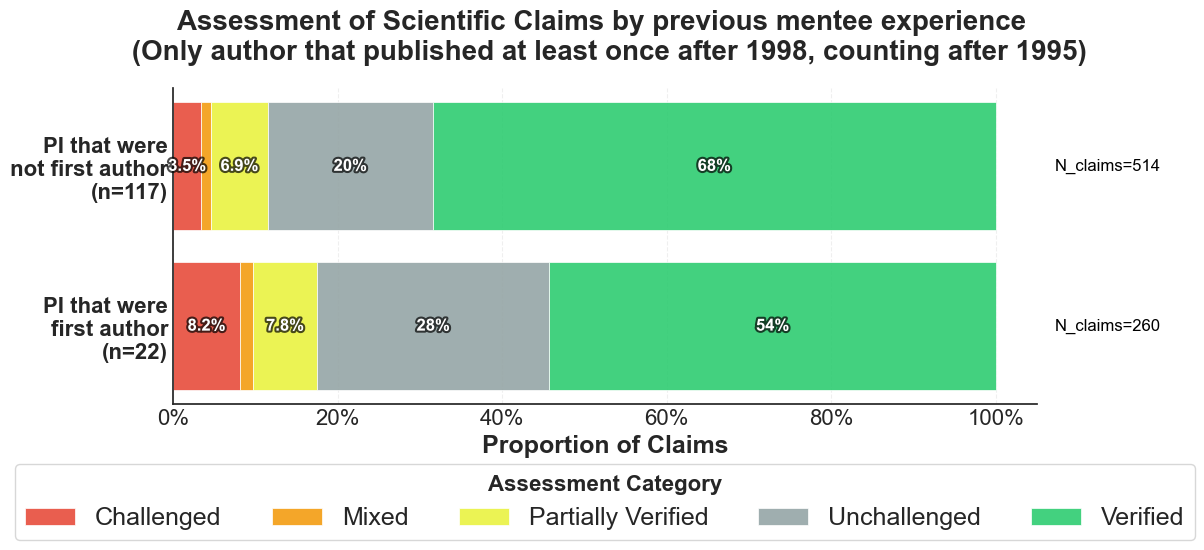

In [8]:
all_categorical_variables = {
            "Historical lab after 1998": {
                "labels": {
                    False:'PI not trained in\ntraditional laboratories', 
                    True:'PI trained in\ntraditional laboratories'},
                "title": "Assessment of Scientific Claims by Laboratory Tradition (only articles after 1995)",
                "fig_name_prefix" : "fig8C_"
                },
            "Continuity": {
                "labels": {
                    False:'Exploratory PI', 
                    True:'Continuity PI'},
                "title": "Assessment of Scientific Claims by Continuity",
                "fig_name_prefix" : "fig9A_"
                },
            "Leading Author Sex": {
                "labels" : None,
                "title": "Assessment of Scientific Claims by Sex",
                "fig_name_prefix" : "fig7A_",
                },
            "Junior Senior": {
                "labels": None,
                "title": "Assessment of Scientific Claims by Junior/Senior PI",
                "fig_name_prefix" : "fig7C_"
                },
            "F and L": {
                "labels": {
                    False:"PI that were\nnot first author", 
                    True:"PI that were\nfirst author"},
                "title": "Assessment of Scientific Claims by previous mentee experience \n (Only author that published at least once after 1998, counting after 1995)",
                "fig_name_prefix" : "fig8B_"
                },
            #"expertise_level": {
            #    "labels": ["Newcomer", "Experienced"],
            #    "title": "Assessment of Scientific Claims by Experience",
            #    "fig_name_prefix" : "fig??_"
            #},
        }

all_comparisons = []

for variable in all_categorical_variables.keys():
    # Group by historical lab status
    if variable == "Historical lab after 1998" or variable == "F and L":
        leading_author_claims_to_plot = leading_author_claims[leading_author_claims['year'] > 1995]
    else:
        leading_author_claims_to_plot = leading_author_claims
    if variable == "F and L":
        # take into account only the author that published at least once once after 1998
        author_to_keep = leading_author_claims[leading_author_claims['year'] > 1998]['leading_author_key'].unique()
        leading_author_claims_to_plot = leading_author_claims_to_plot[leading_author_claims_to_plot['leading_author_key'].isin(author_to_keep)]


    # This is wrong because it tooks the first value of variable for each author
    # am = wrangling.create_author_metric(claim_df = leading_author_claims_to_plot, 
    #                                     variable= "leading_author_key",
    #                                     other_col={"Name":('Name', 'first'),
    #                                                 variable:(variable, 'first')},)
    # if variable != "Historical lab after 1998":
    #     am = am[(am["Major claims"] >= 6) & (author_metrics["Articles"] >= 2)]
    # var_grouped = wrangling.group_categorical_variable(df=am, variable=variable,)
    
    # This was wrong because it overcounted claims when an author had different values for the same variable Utiliser pour les 2025-04-09
    # also this was filtered to only include authors with at least 6 major claims...
    #var_grouped2 = wrangling.prepare_categorical_variable_data(df=leading_author_claims, 
    #                                                author_metrics=author_metrics_to_plot, 
    #                                                variable=variable, 
    #                                                key_col='leading_author_key',
    #                                                assessment_columns=assessment_columns)


    var_grouped = wrangling.create_author_metric(claim_df = leading_author_claims_to_plot, 
                                        variable= variable,
                                        other_col={"Leading Author Name":('Leading Author Name', 'first'), "n_authors":('leading_author_key', 'nunique')}).set_index(variable)
    
    labels = all_categorical_variables[variable]["labels"]
    #if set(var_grouped.index) == set(labels):
    actual_groups = list(var_grouped.index)
    # Print to check if needed:
    print("Actual groups found:", actual_groups)
    if len(actual_groups) == 2:
        sentence, summary = stat_lib.report_categorical_comparison(var_grouped, 
                                                                        actual_groups, 
                                                                        outcome='Challenged',
                                                                        what_str=f"Leading Author {variable} ")
        print("\n"+sentence+"\n")
        all_comparisons.append({'Variable': variable, **summary})

    explain_df = leading_author_claims_to_plot.groupby(["Leading Author Name", variable]).agg(**{
        "Major claims":('id', 'count'),
        "Articles":('article_id', 'nunique')
        },
    ).reset_index().pivot(index="Leading Author Name", columns=variable, values="Major claims")
    explain_df.to_csv(f"figures/figure_tables/{all_categorical_variables[variable]['fig_name_prefix']}categorical_{variable}.csv", 
                    index=True, index_label=f"Name/{variable}", sep=";")

    # Calculate proportions
    for col in assessment_columns:
        var_grouped[f'{col}_prop'] = var_grouped[col] / var_grouped['Major claims']

    print(f"Summary of {variable}:")
    print(var_grouped[['Major claims', 'Articles', 
                        'Verified_prop', 'Challenged_prop', 'Unchallenged_prop', 'n_authors']])

    fig, ax = plot_info.create_horizontal_bar_chart(var_grouped, 
                                                    show_p_value=False, 
                                                    labels_map=labels, 
                                                    title=all_categorical_variables[variable]["title"],
                                                    other_n={"authors": "n_authors"})

    plt.savefig(f"figures/{all_categorical_variables[variable]['fig_name_prefix']}categorical_{variable}.png", dpi=300, bbox_inches='tight')

comparison_df = pd.DataFrame(all_comparisons)
comparison_df.to_csv("figures/figure_tables/summary_categorical_comparisons_leading.csv", sep=";", index=False)



In [9]:
to_plot = author_metrics.copy()

In [10]:
to_plot['Articles'].sort_values(ascending=False)

63     28
78     21
62     16
77     12
123    12
       ..
1       1
19      1
20      1
72      1
0       1
Name: Articles, Length: 156, dtype: int64

/var/folders/pj/15hxgl0j1wg2w_t5k7bvnq5c0000gn/T/ipykernel_62210/3783312957.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = to_plot.groupby('Article_bin')['Challenged prop'].median()


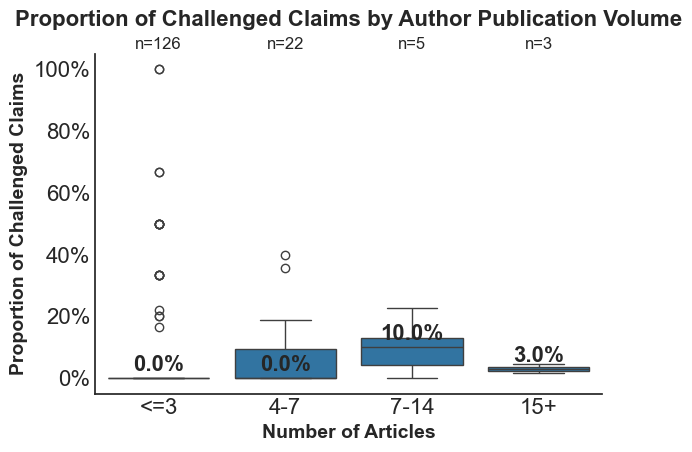

In [11]:

# Create article count bins
article_bins = [.5, 3.5, 7.5, 14.5,  float('inf')]
bin_labels =     ['<=3', '4-7', '7-14', '15+']
to_plot['Article_bin'] = pd.cut(to_plot['Articles'], bins=article_bins, labels=bin_labels)

# Create the boxplot
ax = sns.boxplot(x='Article_bin', y='Challenged prop', data=to_plot)
#ax = sns.stripplot(x='Article_bin', y='Challenged prop', data=to_plot, alpha=0.3, jitter=True, jitter_size=.95, color='black')

# Add individual data points
#sns.stripplot(x='Article_bin', y='Challenged prop', data=to_plot, 
#              color='black', alpha=0.3, jitter=True)

# Add count annotations below each category
for i, cat in enumerate(bin_labels):
    count = len(to_plot[to_plot['Article_bin'] == cat])
    ax.text(i, 1.05, f"n={count}", ha='center', va='top', fontsize=12,
            transform=ax.get_xaxis_transform())

# Format the y-axis as percentage
ax.yaxis.set_major_formatter(plot_info.PercentFormatter(1.0))

# Add labels and title
plt.xlabel('Number of Articles', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Challenged Claims', fontsize=14, fontweight='bold')
plt.title('Proportion of Challenged Claims by Author Publication Volume', 
          fontsize=16, fontweight='bold', pad=20)

# Add median values on top of each box
medians = to_plot.groupby('Article_bin')['Challenged prop'].median()
for i, m in enumerate(medians):
    ax.text(i, m + 0.01, f"{m:.1%}", ha='center', va='bottom', fontweight='bold')

# Remove top and right spines
sns.despine()

plt.tight_layout()
#plt.savefig('figures/fig5C-nb_article_V1.png', dpi=300, bbox_inches='tight')

In [12]:
to_plot

,leading_author_key,Major claims,Articles,Leading Author Name,Challenged,Mixed,Partially Verified,Unchallenged,Verified,Unchallenged prop,Verified prop,Partially Verified prop,Mixed prop,Challenged prop,Article_bin
0,agaisse h,3,1,Agaisse H,0,0,0,2,1,0.666667,0.333333,0.000000,0.0,0.0,<=3
1,aguilera rj,2,1,Aguilera RJ,1,0,0,0,1,0.000000,0.500000,0.000000,0.0,0.5,<=3
2,aigaki t,3,1,Aigaki T,0,0,0,2,1,0.666667,0.333333,0.000000,0.0,0.0,<=3
3,anderson kv,20,8,Anderson KV,2,0,0,7,11,0.350000,0.550000,0.000000,0.0,0.1,7-14
4,ando i,12,6,Andó I,0,0,4,1,7,0.083333,0.583333,0.333333,0.0,0.0,4-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,xu t,3,1,Xu T,0,0,0,0,3,0.000000,1.000000,0.000000,0.0,0.0,<=3
152,yamaguchi m,2,1,Yamaguchi M,0,0,0,1,1,0.500000,0.500000,0.000000,0.0,0.0,<=3
153,yoo ma,3,1,Yoo MA,0,0,1,0,2,0.000000,0.666667,0.333333,0.0,0.0,<=3
154,yu xq,3,1,Yu XQ,0,0,0,1,2,0.333333,0.666667,0.000000,0.0,0.0,<=3


In [13]:
author_metrics

,leading_author_key,Major claims,Articles,Leading Author Name,Challenged,Mixed,Partially Verified,Unchallenged,Verified,Unchallenged prop,Verified prop,Partially Verified prop,Mixed prop,Challenged prop
0,agaisse h,3,1,Agaisse H,0,0,0,2,1,0.666667,0.333333,0.000000,0.0,0.0
1,aguilera rj,2,1,Aguilera RJ,1,0,0,0,1,0.000000,0.500000,0.000000,0.0,0.5
2,aigaki t,3,1,Aigaki T,0,0,0,2,1,0.666667,0.333333,0.000000,0.0,0.0
3,anderson kv,20,8,Anderson KV,2,0,0,7,11,0.350000,0.550000,0.000000,0.0,0.1
4,ando i,12,6,Andó I,0,0,4,1,7,0.083333,0.583333,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,xu t,3,1,Xu T,0,0,0,0,3,0.000000,1.000000,0.000000,0.0,0.0
152,yamaguchi m,2,1,Yamaguchi M,0,0,0,1,1,0.500000,0.500000,0.000000,0.0,0.0
153,yoo ma,3,1,Yoo MA,0,0,1,0,2,0.000000,0.666667,0.333333,0.0,0.0
154,yu xq,3,1,Yu XQ,0,0,0,1,2,0.333333,0.666667,0.000000,0.0,0.0


### Continuous Variables

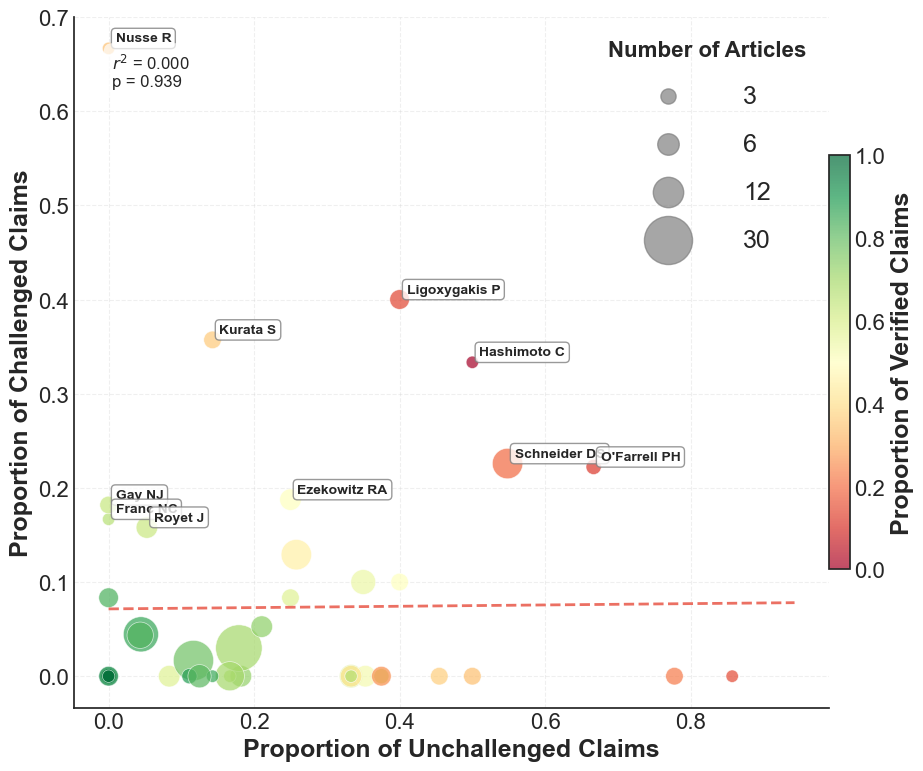

In [14]:
# just take the more than 2 articles annd 6 claims
to_plot = author_metrics.copy()
min_articles = 2
min_claims = 6
to_plot = to_plot[to_plot['Articles'] >= min_articles]
to_plot = to_plot[to_plot['Major claims'] >= min_claims]
fig1, ax1 = plot_info.create_challenged_vs_unchallenged_scatter(to_plot, name_col="Leading Author Name")
plt.savefig('figures/fig9B.png', dpi=300, bbox_inches='tight')

In [15]:
to_plot

,leading_author_key,Major claims,Articles,Leading Author Name,Challenged,Mixed,Partially Verified,Unchallenged,Verified,Unchallenged prop,Verified prop,Partially Verified prop,Mixed prop,Challenged prop
3,anderson kv,20,8,Anderson KV,2,0,0,7,11,0.350000,0.550000,0.000000,0.000000,0.100000
4,ando i,12,6,Andó I,0,0,4,1,7,0.083333,0.583333,0.333333,0.000000,0.000000
23,courey aj,6,2,Courey AJ,0,1,1,0,4,0.000000,0.666667,0.166667,0.166667,0.000000
35,engstrom y,11,6,Engström Y,0,0,1,2,8,0.181818,0.727273,0.090909,0.000000,0.000000
36,ezekowitz ra,16,6,Ezekowitz RA,3,0,1,4,8,0.250000,0.500000,0.062500,0.000000,0.187500
37,fauvarque mo,8,3,Fauvarque MO,0,0,0,3,5,0.375000,0.625000,0.000000,0.000000,0.000000
40,ferrandon d,18,7,Ferrandon D,0,0,1,6,11,0.333333,0.611111,0.055556,0.000000,0.000000
43,franc nc,6,2,Franc NC,1,0,1,0,4,0.000000,0.666667,0.166667,0.000000,0.166667
46,gateff e,6,3,Gateff E,0,0,0,0,6,0.000000,1.000000,0.000000,0.000000,0.000000
47,gay nj,11,4,Gay NJ,2,2,0,0,7,0.000000,0.636364,0.000000,0.181818,0.181818


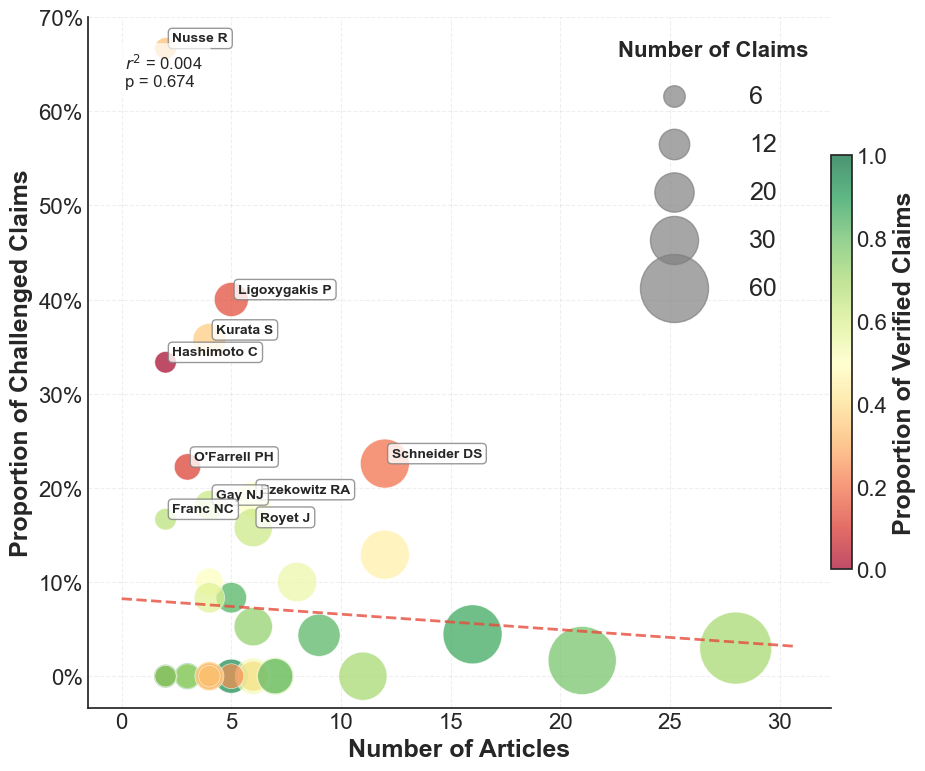

In [17]:

fig2, ax2 = plot_info.create_challenged_vs_articles_scatter(to_plot, name_col="Leading Author Name")
plt.savefig(f'figures/fig7B_scatterA.png', dpi=300, bbox_inches='tight')

<Axes: xlabel='Major claims'>

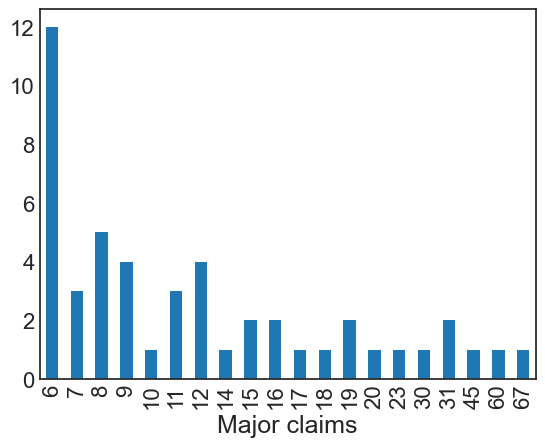

In [18]:
to_plot["Major claims"].value_counts().sort_index().plot(kind='bar')    


<Axes: xlabel='Articles'>

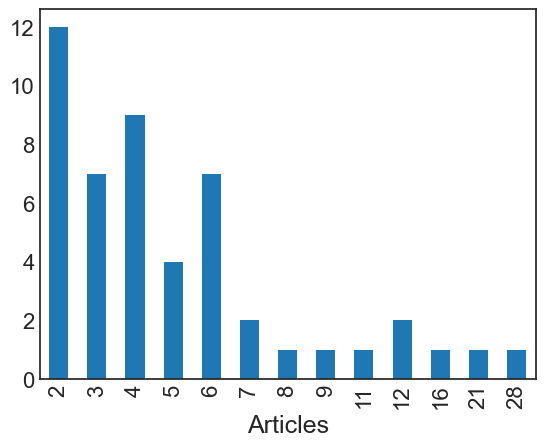

In [19]:
to_plot["Articles"].value_counts().sort_index().plot(kind='bar')    

/Users/chadi/Research/drosophila-reproducibility/plot_info.py:1418: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


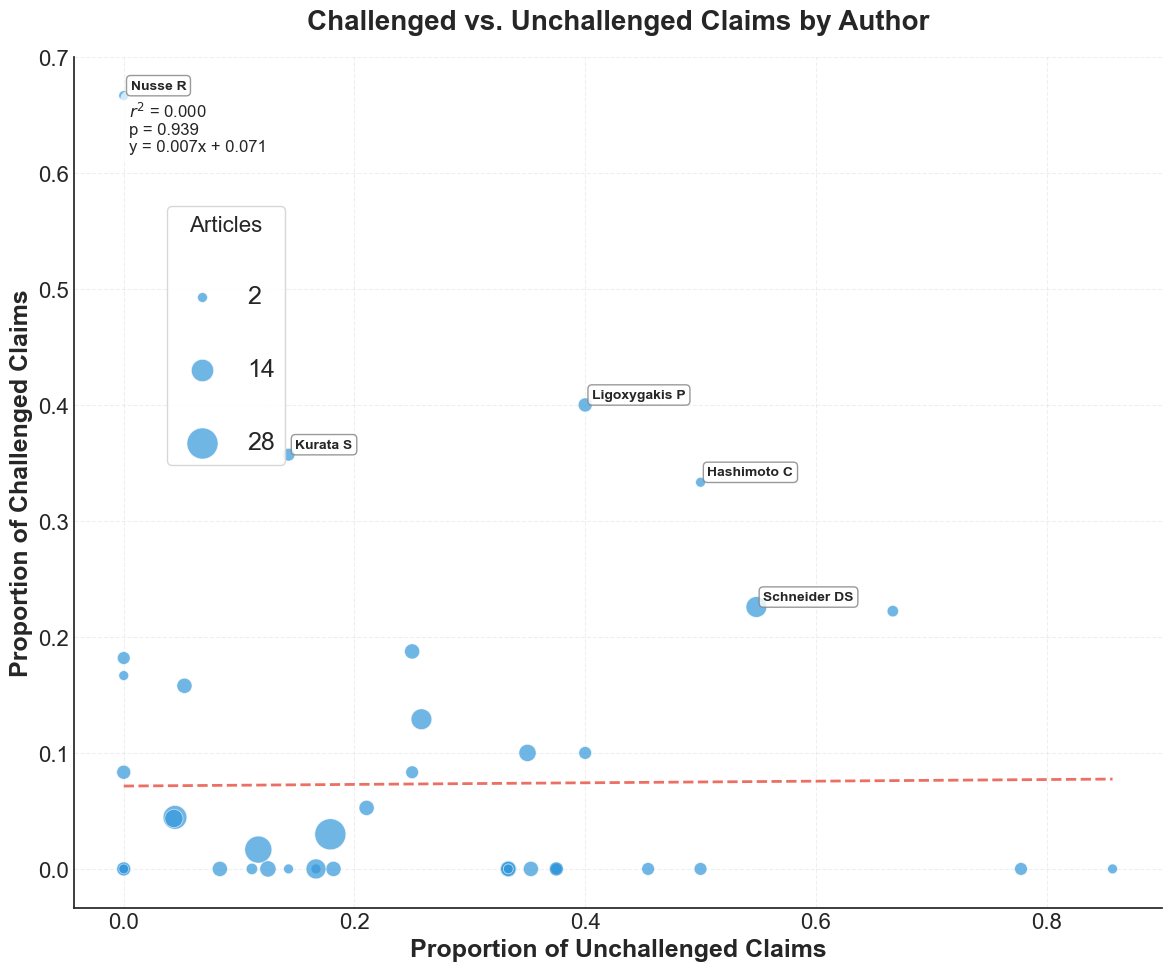

In [22]:
# Example usage for general scatter plot:
fig, ax = plot_info.create_publication_scatter(
    to_plot,
    x_var='Unchallenged prop', 
    y_var='Challenged prop',
    size_var='Articles', 
    title='Challenged vs. Unchallenged Claims by Author',
    x_label='Proportion of Unchallenged Claims',
    y_label='Proportion of Challenged Claims',
    annotate_top_n=5,
    name_col='Leading Author Name',
)
# plt.savefig(f'figures/fig6B_scatterB', dpi=300, bbox_inches='tight')

### Things that uses both

In [23]:
first_author_claims = pd.read_csv("preprocessed_data/first_author_claims.csv")

In [24]:
all_claims = pd.merge(first_author_claims, leading_author_claims, on='id', how='outer', suffixes=('_first', '_last'))

In [25]:
import preprocess_utils


## B. Binary variables

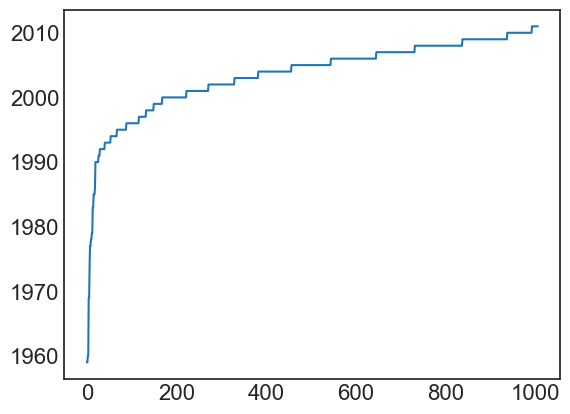

In [26]:
first_papers_year = {}
claims_sorted = preprocess_utils.build_author_key(leading_author_claims, "authors_txt", "all_authors_key")
claims_sorted = claims_sorted.sort_values(by=['year']).reset_index(drop=True)
claims_sorted["year"].plot()
for lh in leading_author_claims["leading_author_key"].unique():
    found = False
    for idx, row in claims_sorted.iterrows():
        all_aut = row["all_authors_key"]
        authors_list = [aut.strip() for aut in all_aut.split(";")]
        if lh in authors_list:
            first_papers_year[lh] = row["year"]
            found = True
            break  # Break out of the inner loop once we find the first paper
    if not found:
        print(f"Warning: No papers found for author {lh}")
first_papers_year = pd.DataFrame.from_dict(first_papers_year, orient='index', columns=['first_paper_year'])

In [27]:
to_plot = pd.merge(first_papers_year, author_metrics, left_index=True, right_on='leading_author_key', how='right')

KeyError: 'Name'

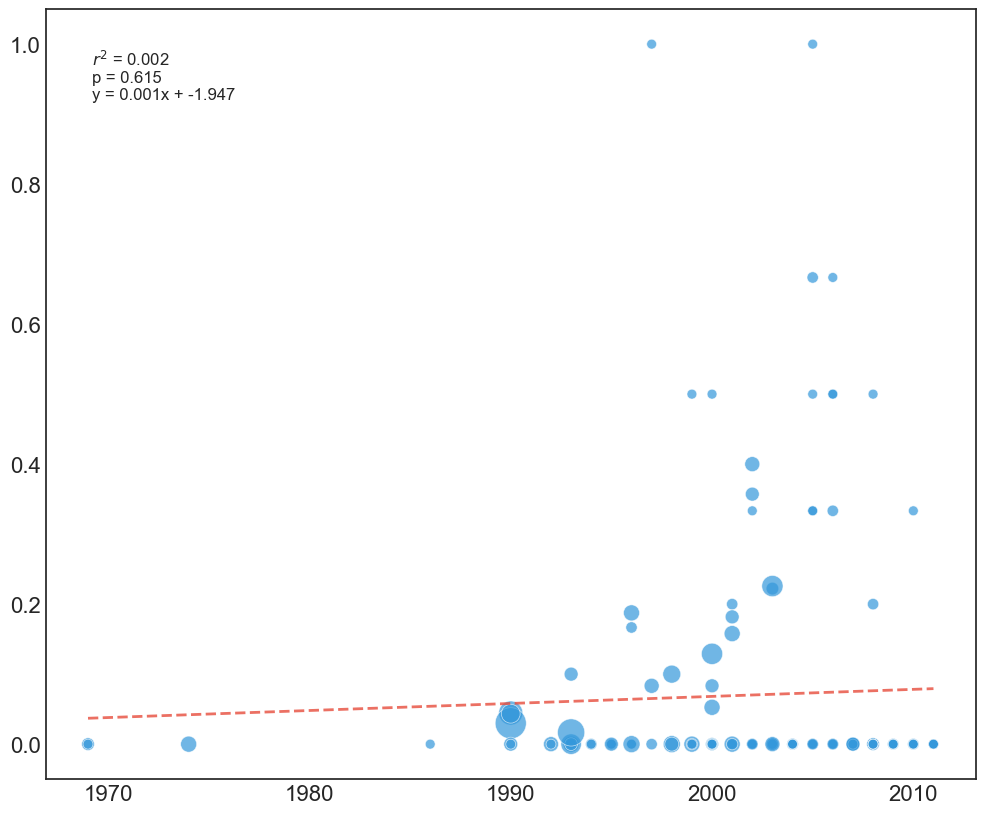

In [ ]:
fig, ax = plot_info.create_publication_scatter(
    to_plot,
    x_var='first_paper_year', 
    y_var='Challenged prop',
    size_var='Articles', 
    title='proportion Challenged vs. year of first paper',
    x_label="year of entry in the field",
    y_label="Proportion of challenged claims",
    annotate_top_n=50,
    name_col='Leading Author Name',
)
ax.set_ylim(0, .7)
ax.vlines(x=1995, ymin=0, ymax=.7, color='grey', linestyle='--')
plt.savefig(f'figures/fig8A_YearVSRepro', dpi=300, bbox_inches='tight')

## Paper III, analyse interview

In [ ]:
all_claims[all_claims["first_author_key"] == "stoven s"]

In [ ]:
all_claims[all_claims["leading_author_key"] == "stoven s"]

In [ ]:
inter_accepted = pd.DataFrame(
    [ "Stöven S", "Meister M", "Royet J", "Ligoxygakis P", "Lazzaro BP", "Bulet P", "Brennan CA", "Ferrandon D", "Engström Y", "Silverman N", "Markus R", 
    "Nicolas E", "Imler JL", "Govind S", "Dionne MS", "Watnick PI", "Apidianakis Y",],
    columns=["Name"])
inter_declined =  pd.DataFrame(["Foley E", "Lee WJ", "Schneider DS", "Kimbrell DA", "Kurata S", "Ip YT", "Fauvarque MO", "Wu LP"],
    columns=["Name"])
inter_excused =  pd.DataFrame(["Wasserman SA", "Kanuka H"],
    columns=["Name"])

all_inter = pd.concat([inter_accepted, inter_declined, inter_excused]).reset_index(drop=True)
all_inter = preprocess_utils.build_author_key(all_inter, "Name", "author_key")
all_inter = preprocess_utils.clean_author_keys(all_inter, "author_key")
all_inter['Major claims'] = 0
all_inter[assessment_columns] = 0

all_claims = preprocess_utils.build_author_key(all_claims, "authors_txt_first", "all_authors_key")
all_claims = preprocess_utils.clean_author_keys(all_claims, "all_authors_key")


for i, row in all_inter.iterrows():
    aut = row["author_key"]
    found = False
    for idx, row2 in all_claims.iterrows():
        all_aut = row2["all_authors_key"]
        authors_list = [aut2.strip() for aut2 in all_aut.split(";")]
        #if aut in authors_list:
        if (aut in row2["leading_author_key"]) or (aut in str(row2["first_author_key"])):
                all_inter.loc[i,'Major claims'] += 1
                this_ass = row2["assessment_type_grouped_last"]
                all_inter.loc[i, this_ass] += 1
                found = True
    if not found:
        print(f"Warning: No papers found for author {aut}")

for col in assessment_columns:
    all_inter[f'{col}_prop'] = all_inter[col] / all_inter['Major claims']

all_inter["Interview"] = all_inter["Name"].apply(
    lambda x: "Accepted" if x in inter_accepted["Name"].values
    else "Declined" if x in inter_declined["Name"].values
    else "Excused" if x in inter_excused["Name"].values
    else None
)

In [ ]:
all_inter

In [ ]:
all_inter.to_csv("interview_assessment.csv", sep=";", index=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and compute
plot_df = all_inter[all_inter["Interview"].notnull()].copy()
plot_df["% Challenged"] = 100 * plot_df["Challenged"] / plot_df["Major claims"]

# Plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", font_scale=1.2)

# Swarmplot
sns.swarmplot(data=plot_df, x="Interview", y="% Challenged", size=7, color=".1", marker='o')

# Pointplot with updated API
sns.pointplot(
    data=plot_df,
    x="Interview",
    y="% Challenged",
    errorbar='sd',
    linestyle='none',
    capsize=0.2,
    markers="D",
    color="darkred",
    err_kws={'linewidth': 1.5}
)

# Aesthetic improvements
plt.ylim(0, plot_df["% Challenged"].max() + 10)  # ensure y-axis is positive and covers full range
plt.title("% of Challenged Claims by Interview Category", fontsize=16)
plt.xlabel("Interview Category")
plt.ylabel("% Challenged Claims")
plt.tight_layout()
plt.show()